<a href="https://colab.research.google.com/github/pmantoine4/PA_D_24/blob/main/Copy_of_Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

#Task 2a: Install the Needed Libraries

#Task 2b: Import the Needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Task 3: Load the Data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/diamonds.csv')


#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [3]:
# The column. names are: carat, cut, color, clarity, depth,  table, price, x, y, and z. According to the documentation of the dataset, x is length, y is width, and z is depth.
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##Get Data Info

In [4]:
# Th dataset contains 53940 rows and 10 columns. Seven columns have numerical values and three have categorical values(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
# To confirm the number of rows and columns
data.shape

(53940, 10)

In [6]:
# The dataset has no missing values
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
# The descriptive statistics show for x, y, and z min values equal to zero. For our analysis, we will drop the rows whose value is zero.
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##Find Missing Values

#Task 5: Perform Data Cleaning

In [8]:
data = data.drop(data[data['x'] == 0].index)
data = data.drop(data[data['y'] == 0].index)
data = data.drop(data[data['z'] == 0].index)

In [9]:
# To confirm the min value for x, y, and z is no more 0. 20 rows have been dropped.
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#Task 6: Visualize Cleaned up Dataset

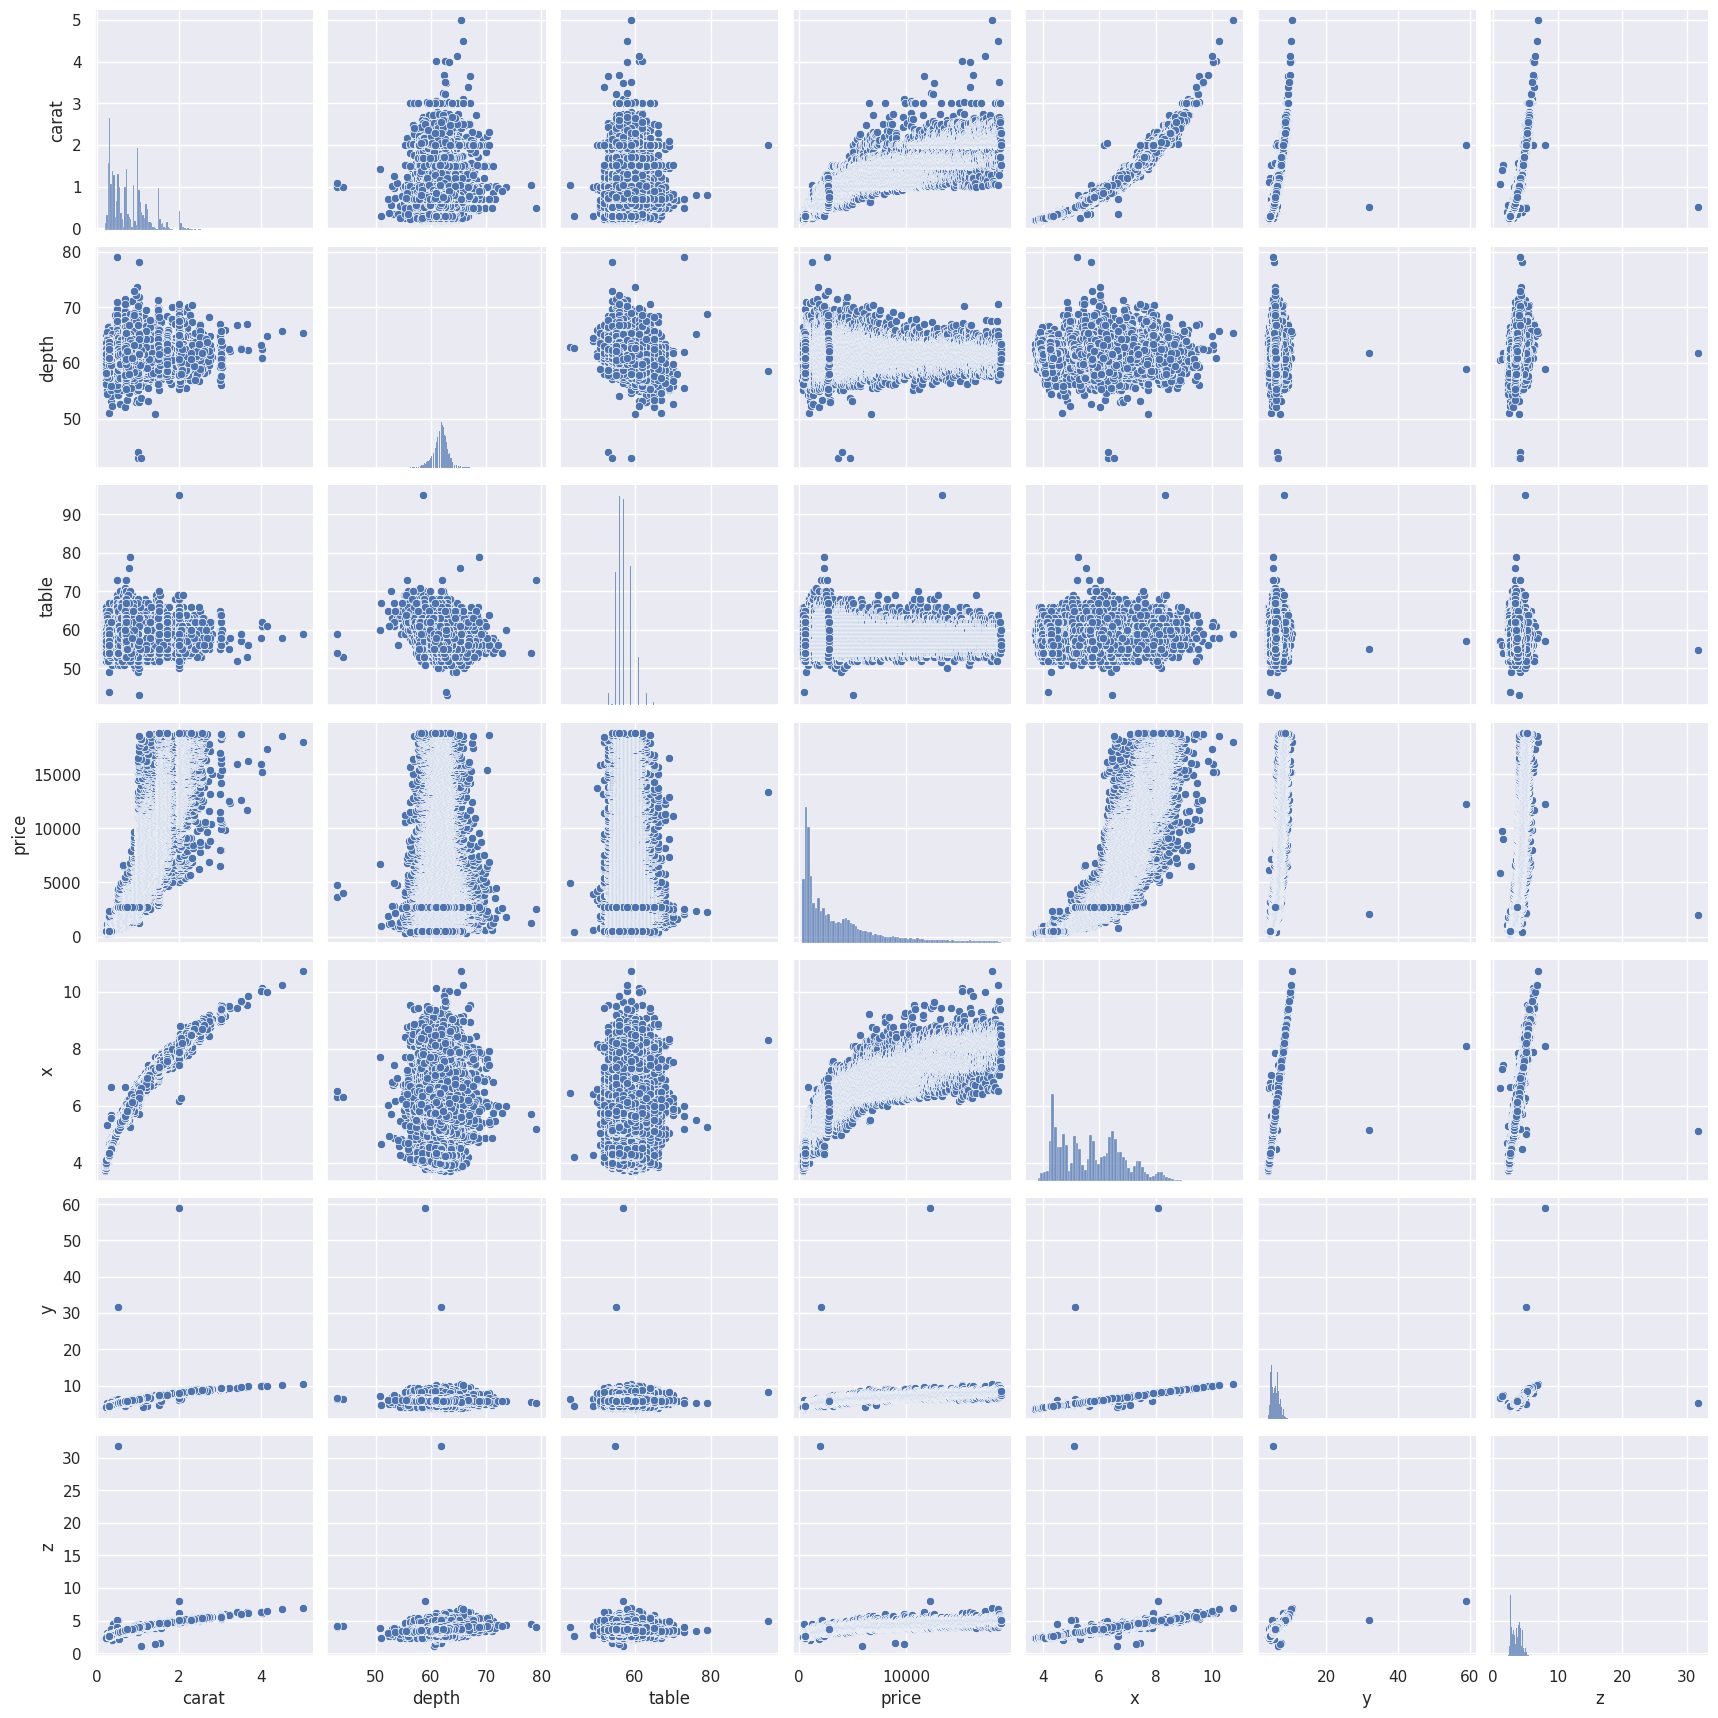

In [10]:
# Pairplot allows us to see both the distribution of variables and the relationships between two variables. Our Target column 'price' shows good relationship with carat, x, y, and z.
pairplot = sns.pairplot(data)


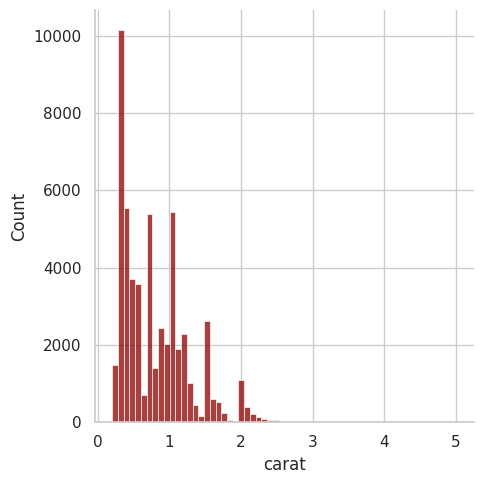

In [13]:
sns.displot(data['carat'].dropna(), kde=False, color='darkred', bins=60)


<Axes: >

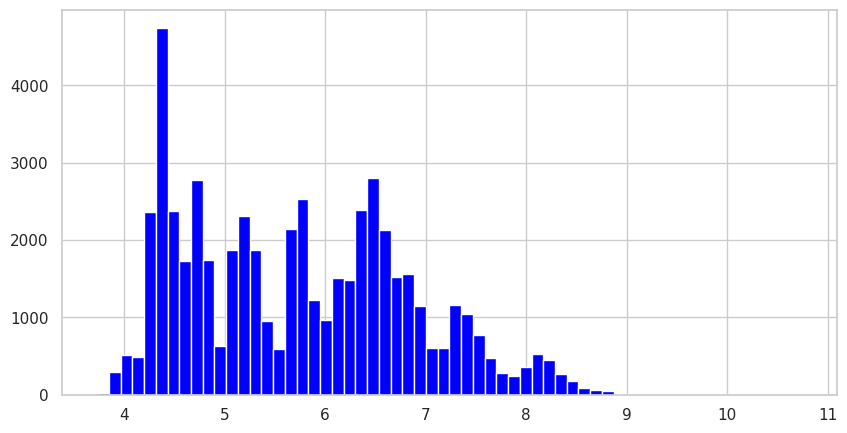

In [14]:
data['x'].hist(color='blue', bins=60, figsize=(10,5))

<Axes: >

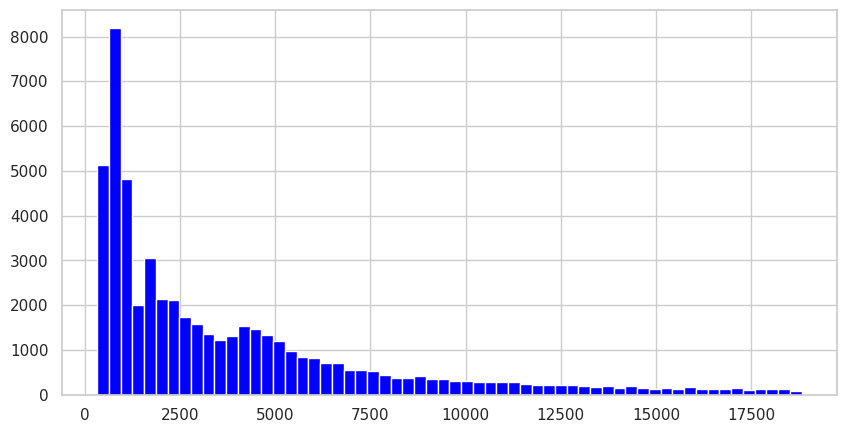

In [16]:
data['price'].hist(color='blue', bins=60, figsize=(10,5))

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

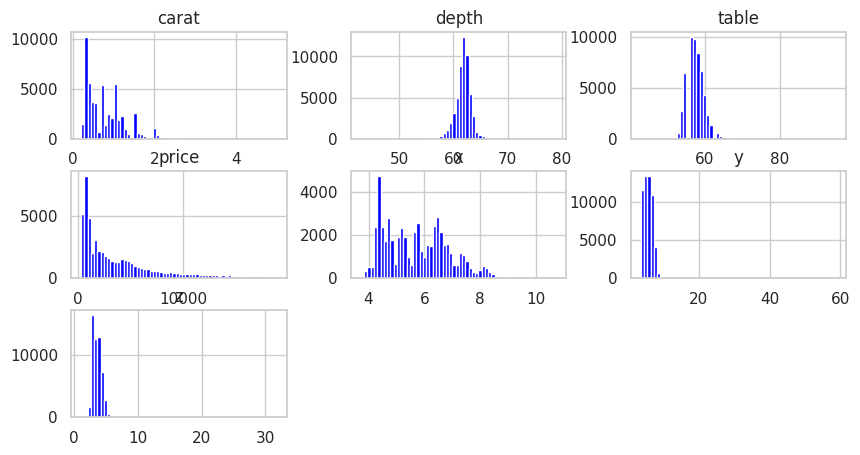

In [17]:
data.hist(color='blue', bins=60, figsize=(10,5))

#Task 7: Conceptualize the problem

#Task 8: Perform Data-Split

In [49]:
cut = pd.get_dummies(data['cut'], drop_first=True)
color = pd.get_dummies(data['color'], drop_first=True)
clarity = pd.get_dummies(data['clarity'], drop_first=True)

KeyError: 'cut'

In [51]:
data = pd.concat([data, cut, color, clarity], axis=1)

#Task 9: Choose the ML Method to follow

In [53]:
x = data[['carat', 'x', 'y', 'z']].values
y = data[['price' ]].values

In [54]:
type(x)

numpy.ndarray

In [55]:
type(y)

numpy.ndarray

#Task 10: Train the ML Model

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [57]:
DecisionTree_model = DecisionTreeRegressor()
DecisionForest_model = RandomForestRegressor()
LinearRegreession_model = LinearRegression()

In [58]:
models = [DecisionTree_model, DecisionForest_model, LinearRegreession_model]
for model in models:
  model.fit(x_train, y_train)
  print(f'{model} is trained!')

DecisionTreeRegressor() is trained!


<ipython-input-58-11e520b39d92>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestRegressor() is trained!
LinearRegression() is trained!


In [59]:
Accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
Accuracy_DecisionForest = DecisionForest_model.score(x_test, y_test)
Accuracy_LinearRegreession = LinearRegreession_model.score(x_test, y_test)

In [60]:
models = [DecisionTree_model, DecisionForest_model, LinearRegreession_model]
for model in models:
  print(f'{model} Accuracy is {model.score(x_test, y_test)}')

DecisionTreeRegressor() Accuracy is 0.7662723029809742
RandomForestRegressor() Accuracy is 0.8650727174578922
LinearRegression() Accuracy is 0.8558664257879489


#Task 11: Test the Model

In [31]:
data.head()

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [32]:
test_x = np.zeros((1, 4))
test_x

array([[0., 0., 0., 0.]])

In [33]:
test_x[0, 0] = 0.70        # carat -- float
test_x[0, 1] = 5.70        # x     -- float
test_x[0, 2] = 5.71        # y     -- float
test_x[0, 3] = 3.53        # z     -- float

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [39]:
test_x

array([[0.7 , 5.7 , 5.71, 3.53]])

In [37]:
models = [DecisionTree_model, DecisionForest_model, LinearRegreession_model]
for model in models:
  prediction = model.predict(test_x)
  print(f'The model {model} predicts a price for a diamond of ${round(float(prediction[0]),2)}')


The model DecisionTreeRegressor() predicts a price for a diamond of $3454.0
The model RandomForestRegressor() predicts a price for a diamond of $2619.99
The model LinearRegression() predicts a price for a diamond of $2954.61


<ipython-input-37-8f883ca27880>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'The model {model} predicts a price for a diamond of ${round(float(prediction[0]),2)}')


In [70]:
import pickle # Import the pickle module to enable saving the model

# Assuming 'DecisionForest_model' is the correct variable name
pickle.dump(DecisionForest_model,open('/content/drive/MyDrive/Classroom/Data Science: Predictive Analytics Cohort 6/Spring 2024 - Predictive Analytics/Projects/Diamond Price Prediction/model.pkl','wb'))

In [71]:
joblib.dump(DecisionForest_model, 'DecisionForest_model.joblib')

['DecisionForest_model.joblib']

In [72]:
"""
The pickle library/method takes a number of parameters,
1.  the thing we want to save
2.  the place in which we want to save whatever it is that we want to save
3.  the mode for the method to access the file and place for the save.
"""

'\nThe pickle library/method takes a number of parameters,\n1.  the thing we want to save\n2.  the place in which we want to save whatever it is that we want to save\n3.  the mode for the method to access the file and place for the save.\n'

In [ ]:
reg = joblib.load('DecisionForest_model.joblib')

In [74]:
predictions = DecisionForest_model.predict(test_x)
predictions

array([2602.14916667])

In [75]:
print(f'The model predicts a price for a diamond of ${round(float(predictions[0]), 2)}')

The model predicts a price for a diamond of $2602.15
